In [1]:
#!pip install dicom2jpg


In [2]:
pip install pydicom Pillow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [216]:
import os
import pydicom
from PIL import Image
import numpy as np

def dicom_to_png_folder(input_folder, output_folder):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Walk through all subdirectories and files in the input folder
    for root, _, files in os.walk(input_folder):
        for file in files:
            if file:
                print(file)
                dicom_path = os.path.join(root, file)
                # print(dicom_path)
                relative_path = os.path.relpath(root, input_folder)
                # print("sss",relative_path)
                save_folder = os.path.join(output_folder)
                # print(save_folder)
                
                # Ensure subfolder structure is replicated in the output folder
                os.makedirs(save_folder, exist_ok=True)
                

                # Define the PNG output path
                png_path = os.path.join(save_folder, f"{os.path.splitext(file)[0]}.png")
                print(png_path)
                

                # Read the DICOM file
                dicom_data = pydicom.dcmread(dicom_path)
                pixel_array = dicom_data.pixel_array

                # Normalize pixel data for display
                pixel_array = (pixel_array - np.min(pixel_array)) / (np.max(pixel_array) - np.min(pixel_array))
                pixel_array = (pixel_array * 255).astype(np.uint8)

                # Create and save the PNG image
                image = Image.fromarray(pixel_array)
                image.save(png_path, 'PNG')

                print(f"Saved: {png_path}")
                

# Example usage
dicom_to_png_folder(input_folder='E:/data set/55 to 60 years/ADNI/068_S_2187/AXIAL_T2_STAR/2011-06-09_15_19_46.0/I241818',output_folder='E:/data set/50 too 60 years/png')

print("All DICOM files have been converted to PNG!")


ADNI_068_S_2187_MR_AXIAL_T2_STAR__br_raw_20110627131920055_43_S112608_I241818.dcm
E:/data set/50 too 60 years/png\ADNI_068_S_2187_MR_AXIAL_T2_STAR__br_raw_20110627131920055_43_S112608_I241818.png
Saved: E:/data set/50 too 60 years/png\ADNI_068_S_2187_MR_AXIAL_T2_STAR__br_raw_20110627131920055_43_S112608_I241818.png
ADNI_068_S_2187_MR_AXIAL_T2_STAR__br_raw_20110627131920149_44_S112608_I241818.dcm
E:/data set/50 too 60 years/png\ADNI_068_S_2187_MR_AXIAL_T2_STAR__br_raw_20110627131920149_44_S112608_I241818.png
Saved: E:/data set/50 too 60 years/png\ADNI_068_S_2187_MR_AXIAL_T2_STAR__br_raw_20110627131920149_44_S112608_I241818.png
ADNI_068_S_2187_MR_AXIAL_T2_STAR__br_raw_20110627131920289_41_S112608_I241818.dcm
E:/data set/50 too 60 years/png\ADNI_068_S_2187_MR_AXIAL_T2_STAR__br_raw_20110627131920289_41_S112608_I241818.png
Saved: E:/data set/50 too 60 years/png\ADNI_068_S_2187_MR_AXIAL_T2_STAR__br_raw_20110627131920289_41_S112608_I241818.png
ADNI_068_S_2187_MR_AXIAL_T2_STAR__br_raw_20110627

In [1]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1. Load the Data
csv_file_path = 'C:/Users/Roshan/Downloads/5 dec/data.csv'  # Replace with the actual CSV file path
df = pd.read_csv(csv_file_path)

In [2]:
print(df.head())

  Image_Name     Subject Group Sex  Age Visit Modality        Description  \
0    I286426  013_S_2389  EMCI   F   59   m06      MRI  3 Plane Localizer   
1    I286424  013_S_2389  EMCI   F   59   m06      MRI      MPRAGE SENSE2   
2    I286422  013_S_2389  EMCI   F   59   m06      MRI  3 Plane Localizer   
3    I286423  013_S_2389  EMCI   F   59   m06      MRI             MPRAGE   
4    I286421  013_S_2389  EMCI   F   59   m06      MRI      Field Mapping   

       Type   Acq Date Format Downloaded  
0  Original  2/15/2012    DCM  12/2/2024  
1  Original  2/15/2012    DCM  12/2/2024  
2  Original  2/15/2012    DCM  12/2/2024  
3  Original  2/15/2012    DCM  12/2/2024  
4  Original  2/15/2012    DCM  12/2/2024  


In [3]:

# 2. Clean the Data (strip any extra spaces in column names)
df.columns = df.columns.str.strip()


In [4]:
# 3. Prepare Image Paths and Labels
image_folder_path = 'C:/Users/Roshan/Downloads/5 dec/images/ADNI/PNG 012-S-2324'  # Replace with the actual image folder path
train_image_paths = [os.path.join(image_folder_path, fname) for fname in df['Image_Name']]  # Use correct column name for images
train_gender_labels = df['Sex'].map({'Male': 0, 'Female': 1}).values  # Male=0, Female=1
train_age_labels = df['Age'].values  # Assuming Age is a continuous value, otherwise you can bin it into categories


In [5]:
import os
import pandas as pd
from tensorflow.keras.preprocessing import image
import numpy as np

# Example image folder path where generated images are stored
image_folder_path = 'C:/Users/Roshan/Downloads/5 dec/images/ADNI/PNG 012-S-2324'

# Load your CSV file into a DataFrame (replace this with your actual file)
df = pd.read_csv('C:/Users/Roshan/Downloads/5 dec/data.csv')

# Extract IDs from the 'Image_name' column (e.g., I286426, I286424)
image_ids = df['Image_Name'].values

# Prepare a list of the corresponding image paths based on matching the IDs
train_image_paths = []

# Loop through each image name in the CSV and find the corresponding generated image
for img_id in image_ids:
    # Try to find a matching image in the directory
    for filename in os.listdir(image_folder_path):
        if str(img_id) in filename:  # Match the ID part in the filename
            image_path = os.path.join(image_folder_path, filename)
            train_image_paths.append(image_path)
            break  # Exit once a match is found


In [6]:
# Check the length of image paths and labels
print("Number of images:", len(train_image_paths))
print("Number of gender labels:", len(train_gender_labels))
print("Number of age labels:", len(train_age_labels))


Number of images: 198
Number of gender labels: 219
Number of age labels: 219


In [7]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
import numpy as np

# Example image folder path where generated images are stored
image_folder_path = 'C:/Users/Roshan/Downloads/5 dec/images/ADNI/PNG 012-S-2324'

# Load your CSV file into a DataFrame (replace this with your actual file)
df = pd.read_csv('C:/Users/Roshan/Downloads/5 dec/data.csv')

# Map 'Sex' column to numeric values
df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})

# Ensure 'Age' is numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Extract IDs from the 'Image_Name' column
image_ids = df['Image_Name'].values

# Prepare a list of the corresponding image paths and labels
train_image_paths = []
train_labels_sex = []
train_labels_age = []

# Loop through each image name in the CSV and find all matching images in the directory
for img_id in image_ids:
    # Find all images corresponding to the current ID
    for filename in os.listdir(image_folder_path):
        if str(img_id) in filename:  # Match the ID part in the filename
            image_path = os.path.join(image_folder_path, filename)
            train_image_paths.append(image_path)
            
            # Get the 'Sex' and 'Age' labels from the CSV
            sex_label = df.loc[df['Image_Name'] == img_id, 'Sex'].values[0]
            age_label = df.loc[df['Image_Name'] == img_id, 'Age'].values[0]
            train_labels_sex.append(sex_label)
            train_labels_age.append(age_label)


# Create a DataFrame with image paths, sex labels, and age labels
data = pd.DataFrame({
    'image_path': train_image_paths,
    'sex': train_labels_sex,
    'age': train_labels_age
})

# Perform a single train-test split
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

# Extract the training and testing data
x_train = train_df['image_path'].values
y_train_sex = train_df['sex'].values
y_train_age = train_df['age'].values

x_test = test_df['image_path'].values
y_test_sex = test_df['sex'].values
y_test_age = test_df['age'].values


# Check the length of image paths and labels
print("Number of X training images:", len(x_train))
print("Number of X testing images:", len(x_test))
print("Number of Y training labels (Sex):", len(y_train_sex))
print("Number of Y training labels (Age):", len(y_train_age))


Number of X training images: 9700
Number of X testing images: 2425
Number of Y training labels (Sex): 9700
Number of Y training labels (Age): 9700


In [8]:
data

,image_path,sex,age
0,C:/Users/Roshan/Downloads/5 dec/images/ADNI/PN...,0,59
1,C:/Users/Roshan/Downloads/5 dec/images/ADNI/PN...,0,59
2,C:/Users/Roshan/Downloads/5 dec/images/ADNI/PN...,0,59
3,C:/Users/Roshan/Downloads/5 dec/images/ADNI/PN...,0,59
4,C:/Users/Roshan/Downloads/5 dec/images/ADNI/PN...,0,59
...,...,...,...
12120,C:/Users/Roshan/Downloads/5 dec/images/ADNI/PN...,0,57
12121,C:/Users/Roshan/Downloads/5 dec/images/ADNI/PN...,0,57
12122,C:/Users/Roshan/Downloads/5 dec/images/ADNI/PN...,0,57
12123,C:/Users/Roshan/Downloads/5 dec/images/ADNI/PN...,0,57


In [9]:

# Preprocess the images for training and testing (resize and normalize)
def preprocess_images(image_paths, target_size=(224, 224)):
    image_list = []
    for img_path in image_paths:
        img = image.load_img(img_path, target_size=target_size)  # Resize to target size
        img_array = image.img_to_array(img)  # Convert to NumPy array
        img_array_normalized = img_array / 255.0  # Normalize pixel values to [0, 1]
        image_list.append(img_array_normalized)
    return np.array(image_list)

# Preprocess training and testing data
x_train_processed = preprocess_images(x_train)
x_test_processed = preprocess_images(x_test)

# Now you can proceed to define and train your model
print("Shape of X_train_processed:", x_train_processed.shape)
print("Shape of X_test_processed:", x_test_processed.shape)


Shape of X_train_processed: (9700, 224, 224, 3)
Shape of X_test_processed: (2425, 224, 224, 3)


In [10]:

# Example: Create a model that predicts both 'Sex' and 'Age'
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

input_layer = Input(shape=(224, 224, 3))

# Feature extraction layers
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)

# Branch for 'Sex' prediction
sex_output = Dense(1, activation='sigmoid', name='sex_output')(x)

# Branch for 'Age' prediction
age_output = Dense(1, activation='linear', name='age_output')(x)

# Combine the model
model = Model(inputs=input_layer, outputs=[sex_output, age_output])

model.compile(
    optimizer='adam',
    loss={'sex_output': 'binary_crossentropy', 'age_output': 'mean_squared_error'},
    metrics={'sex_output': 'accuracy', 'age_output': 'mae'}
)




In [11]:
# Train the model
history = model.fit(
    x_train_processed, 
    {'sex_output': np.array(y_train_sex), 'age_output': np.array(y_train_age)},
    validation_split=0.2,
    epochs=10,
    batch_size=32
)

# Evaluate the model
results = model.evaluate(x_test_processed, {'sex_output': np.array(y_test_sex), 'age_output': np.array(y_test_age)})
print("Test Results:", results)

Epoch 1/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 159s 609ms/step - age_output_loss: 11.8812 - age_output_mae: 48.4019 - loss: 3243.2915 - sex_output_accuracy: 0.2511 - sex_output_loss: 3231.4097 - val_age_output_loss: 12.0303 - val_age_output_mae: 52.9139 - val_loss: 3243.7734 - val_sex_output_accuracy: 0.2454 - val_sex_output_loss: 3231.9651
Epoch 2/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 176s 504ms/step - age_output_loss: 12.0045 - age_output_mae: 55.9921 - loss: 3240.4246 - sex_output_accuracy: 0.2470 - sex_output_loss: 3228.4209 - val_age_output_loss: 12.0303 - val_age_output_mae: 52.9139 - val_loss: 3243.7734 - val_sex_output_accuracy: 0.2454 - val_sex_output_loss: 3231.9651
Epoch 3/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 120s 494ms/step - age_output_loss: 12.1545 - age_output_mae: 55.6435 - loss: 3242.0498 - sex_output_accuracy: 0.2376 - sex_output_loss: 3229.8945 - val_age_output_loss: 12.0303 - val_age_output_mae: 52.9139 - val_loss: 3243.7734 - val_sex_output_accuracy: 0.2454 - val_sex_output_loss: 32

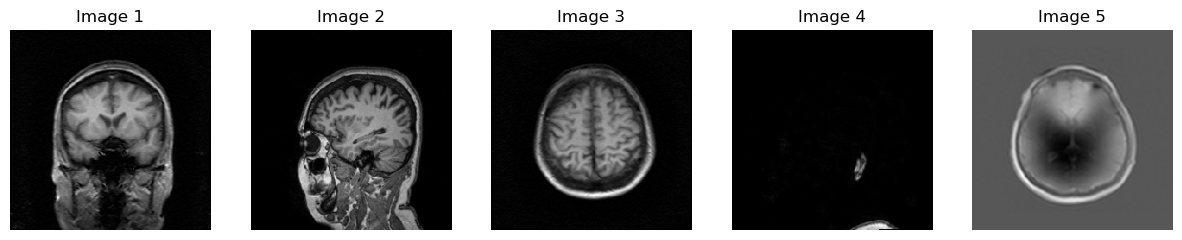

In [310]:
# Number of images to display
num_images_to_display = 5

# Plot the images
plt.figure(figsize=(15, 15))
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(X_train[i])  # Display the image from X_train
    plt.axis('off')  # Hide axes
    plt.title(f"Image {i+1}")
plt.show()
